# Visualizations

In [12]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
# IMPORT THE DATA
df = pd.read_csv('CAGmembers.csv')

In [8]:
df.head()

,AM,Strength 1,Strength 2,Strength 3,Strength 4,Strength 5,Core/Key
0,0,Arranger,Restorative,Positivity,Relator,Strategic,Manager
1,1,Analytical,Restorative,Learner,Input,Strategic,Manager
2,2,Competitor,Significance,Futuristic,Restorative,Achiever,Core
3,3,Activator,Achiever,Focus,Competitor,Positivity,Manager
4,4,Woo,Communicator,Achiever,Competitor,Relator,Core


In [26]:
df

,AM,Strength 1,Strength 2,Strength 3,Strength 4,Strength 5,Core/Key
0,0,Arranger,Restorative,Positivity,Relator,Strategic,Manager
1,1,Analytical,Restorative,Learner,Input,Strategic,Manager
2,2,Competitor,Significance,Futuristic,Restorative,Achiever,Core
3,3,Activator,Achiever,Focus,Competitor,Positivity,Manager
4,4,Woo,Communicator,Achiever,Competitor,Relator,Core
5,5,Learner,Input,Achiever,Ideation,Adaptability,Core
6,6,Harmony,Includer,Positivity,Woo,Adaptability,Core
7,7,Intellection,Deliberative,Harmony,Adaptability,Restorative,Core
8,8,Discipline,Activator,Arranger,Focus,Achiever,Core
9,9,Arranger,Belief,Competitor,Positivity,Harmony,Core


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
AM            18 non-null int64
Strength 1    13 non-null object
Strength 2    13 non-null object
Strength 3    13 non-null object
Strength 4    13 non-null object
Strength 5    13 non-null object
Core/Key      18 non-null object
dtypes: int64(1), object(6)
memory usage: 1.1+ KB


In [10]:
# drop my nulls
df.dropna(how = 'any', axis = 0, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 14
Data columns (total 7 columns):
AM            13 non-null int64
Strength 1    13 non-null object
Strength 2    13 non-null object
Strength 3    13 non-null object
Strength 4    13 non-null object
Strength 5    13 non-null object
Core/Key      13 non-null object
dtypes: int64(1), object(6)
memory usage: 832.0+ bytes


In [29]:
G = nx.Graph() # note the capital 'g' on the module!

G.add_nodes_from(df['AM'])



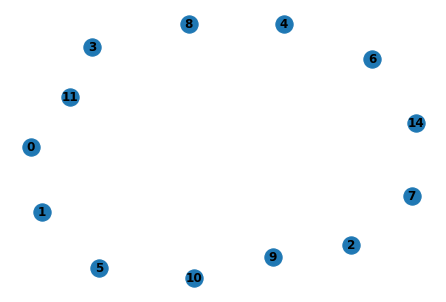

In [30]:
nx.draw(
    G, 
    with_labels = True,
    font_weight = 'bold',
)

### graph all the possible combinations

In [31]:
from itertools import combinations

# combos = list(combinations(df['AM'], df['AM']))
combos = list(combinations(df['AM'], 2))


combos

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 14),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 14),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 14),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 14),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 14),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 14),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 14),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 14),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 14),
 (9, 10),
 (9, 11),
 (9, 14),
 (10, 11),
 (10, 14),
 (11, 14)]

In [32]:
len(combos)

78

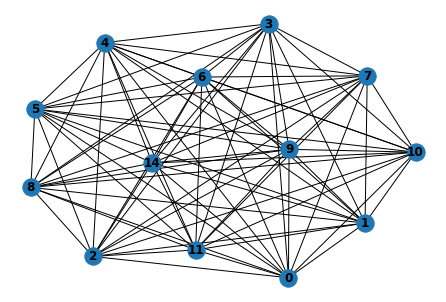

In [33]:
G.add_edges_from(combos)

nx.draw(
    G, 
    with_labels = True,
    font_weight = 'bold',
)

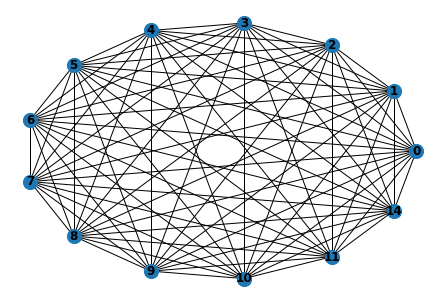

In [34]:
# force this to a more legible graph

nx.draw_kamada_kawai(
    G,
    alpha = 1, # opacity
    with_labels = True,
    font_weight = 'bold',
    node_size = 200, # smaller node size, default is 300
)

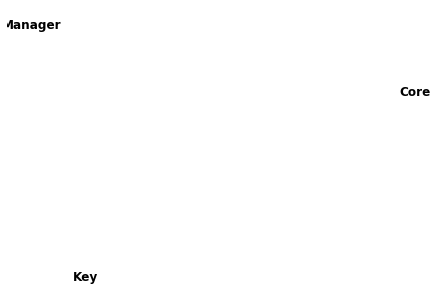

In [39]:
G = nx.Graph()

G.add_nodes_from(df['Core/Key'])

nx.draw(G,
        with_labels = True,
        font_weight = 'bold',
        node_color = 'white', 
        font_color = 'black',
        )

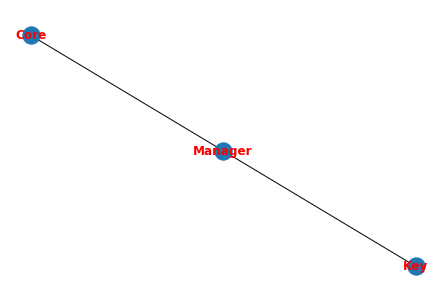

In [41]:
G.add_edges_from([
    ('Core', 'Manager'),
    ('Key', 'Manager'),
])

nx.draw(G, with_labels = True, font_weight = 'bold', font_color = 'red',)

# Categories

In [51]:
cat = pd.read_csv('Categories.csv')


In [52]:
cat.columns

Index(['Executing', 'Influencing', 'Relationship-Building',
       'Strategic Thinking', 'Unnamed: 4'],
      dtype='object')

In [53]:
cat.drop(columns = 'Unnamed: 4', axis = 1, inplace = True)

In [54]:
cat.columns

Index(['Executing', 'Influencing', 'Relationship-Building',
       'Strategic Thinking'],
      dtype='object')

In [55]:
cat

,Executing,Influencing,Relationship-Building,Strategic Thinking
0,Achiever,Activator,Adaptability,Analytical
1,Arranger,Command,Connectedness,Context
2,Belief,Communication,Developer,Futuristic
3,Consistency,Competition,Empathy,Ideation
4,Deliberative,Maximizer,Harmony,Input
5,Discipline,Self-Assurance,Includer,Intellection
6,Focus,Significance,Individualization,Learner
7,Responsibility,Woo,Positivity,Strategic
8,Restorative,NaN,Relator,NaN


In [48]:
# visualization idea: replace all the strengths with their umbrella category, and then visually cluster the AMs based on the number of each category they have?


In [ ]:
# ex: row 1 has 1 Executing Skill and 4 Strategic Thinking skills

In [57]:
df.loc[1]

AM                      1
Strength 1     Analytical
Strength 2    Restorative
Strength 3        Learner
Strength 4          Input
Strength 5      Strategic
Core/Key          Manager
Name: 1, dtype: object

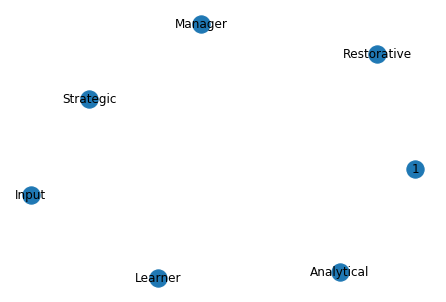

In [63]:
G = nx.Graph()

G.add_nodes_from(df.loc[1])

nx.draw(
    G,
    with_labels = True,
)

In [ ]:
# next, subset the dataframe down to just the columns I need